# A one dimensional quantum well 

[Go back to index](./index.ipynb)

In this widget, one can choice the height and width of a quantum well. The widget gives the eigenfunctions and eigenvalues from the numerical solution. 

In [25]:
%matplotlib widget
from pylab import axes, setp, axis, xlabel, ylabel, title, plot, subplot, draw, connect, show
from numpy import linspace, sqrt, ones, arange, diag, argsort, zeros
from scipy.linalg import eig, eigh_tridiagonal
import matplotlib.pyplot as plt


def singlewell_potential(x, x0, width, depth):
    x1 = zeros(len(x))
    for i in range(len(x)):
        if x[i] > x0 - width/2.0 and x[i] < x0 + width/2.0:
            x1[i] = depth
    return x1
    

def diagonalisierung(hquer, L, N, pot=singlewell_potential, x0 = 0.0, width = 0.1, depth = 0.0):
    """Calculated sorted eigenvalues and eigenfunctions. 

       Input:
         hquer: Planck constant
         L: set viewed interval [-L,L] 
         N: number of grid points i.e. size of the matrix 
         pot: potential function of the form pot
         x0: center of the quantum well
         width: the width of the quantum well
         depth: the depth of the quantum well
       Ausgabe:
         ew: sortierte Eigenwerte (Array der Laenge N)
         ef: entsprechend sortierte Eigenvektoren, ef[:,i] (Groesse N*N)
         x: Ortsgitter (Array der Laenge N)
         dx: Ortsgitterabstand
         V: Potential an den Stellen x (Array der Laenge N)
    """
    x = linspace(-L, L, N+2)[1:N+1]                 # grid points
    dx = x[1] - x[0]                                # grid spacing
    V = pot(x, x0, width, depth)
    z = hquer**2 /2.0/dx**2                         # second diagonals

    ew, ef = eigh_tridiagonal(V+2.0*z, -z*ones(N-1))
    ew = ew.real                                    # real part of the eigenvalues
    ind = argsort(ew)                               # Indizes f. sort. Array
    ew = ew[ind]                                    # Sortieren der ew nach ind
    ef = ef[:, ind]                                 # Sortieren der Spalten von
                                                    #  ef nach ind
    ef = ef/sqrt(dx)                                # richtige Normierung 
    return ew, ef, x, dx, V


def plot_eigenfunktionen(ax, ew, ef, x, V, width=1, Emax=0.1, fak=0.009):
    """Plot der niedrigsten Eigenfunktionen 'ef' im Potential 'V(x)'
       auf Hoehe der Eigenwerte 'ew' in den Plotbereich 'ax'.
       
       Der optionale Parameter 'width' (mit Defaultwert 1)
       gibt die Linienstaerke beim Plot der Eigenfunktionen
       an. 'width' kann auch ein Array von Linienstaerken sein.
       'Emax' (mit Default-Wert V_0/10) legt die Energieobergrenze
       fuer den Plot fest.
       'fak' ist ein Skalierungsfaktor fuer die graphische Darstellung
       der Eigenfunktionen.
    """
    
    ax[0].plot(x, V, c='r')
    ax[1].plot(x, V, c='k', linewidth=1.0)
    
    ax[0].set_xlim([min(x), max(x)])
    ax[0].set_ylim([min(V), Emax])
    
    ax[0].set_xlabel(r'$x/a$', fontsize = 10)
    ax[0].set_ylabel(r'$V(x)/V_0\ \rm{, Eigenfunctions\ with\ Eigenvalues}$', fontsize = 10)
    
    ax[1].set_xlim([min(x), max(x)])
    ax[1].set_ylim([min(V), Emax])
    
    ax[1].set_xlabel(r'$x/a$', fontsize = 10)
    ax[1].set_ylabel(r'$V(x)/V_0\ \rm{, Eigenfunctions\ with\ Eigenvalues}$', fontsize = 10)
      
    indmax = sum(ew<=Emax)                       
    colors = ['b', 'g', 'r', 'c', 'm', 'y']      
    if not hasattr(width, "__iter__"):           
        width = width*ones(indmax)               
    for i in arange(indmax):                     
        ax[1].plot(x, fak*abs(ef[:, i])**2+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

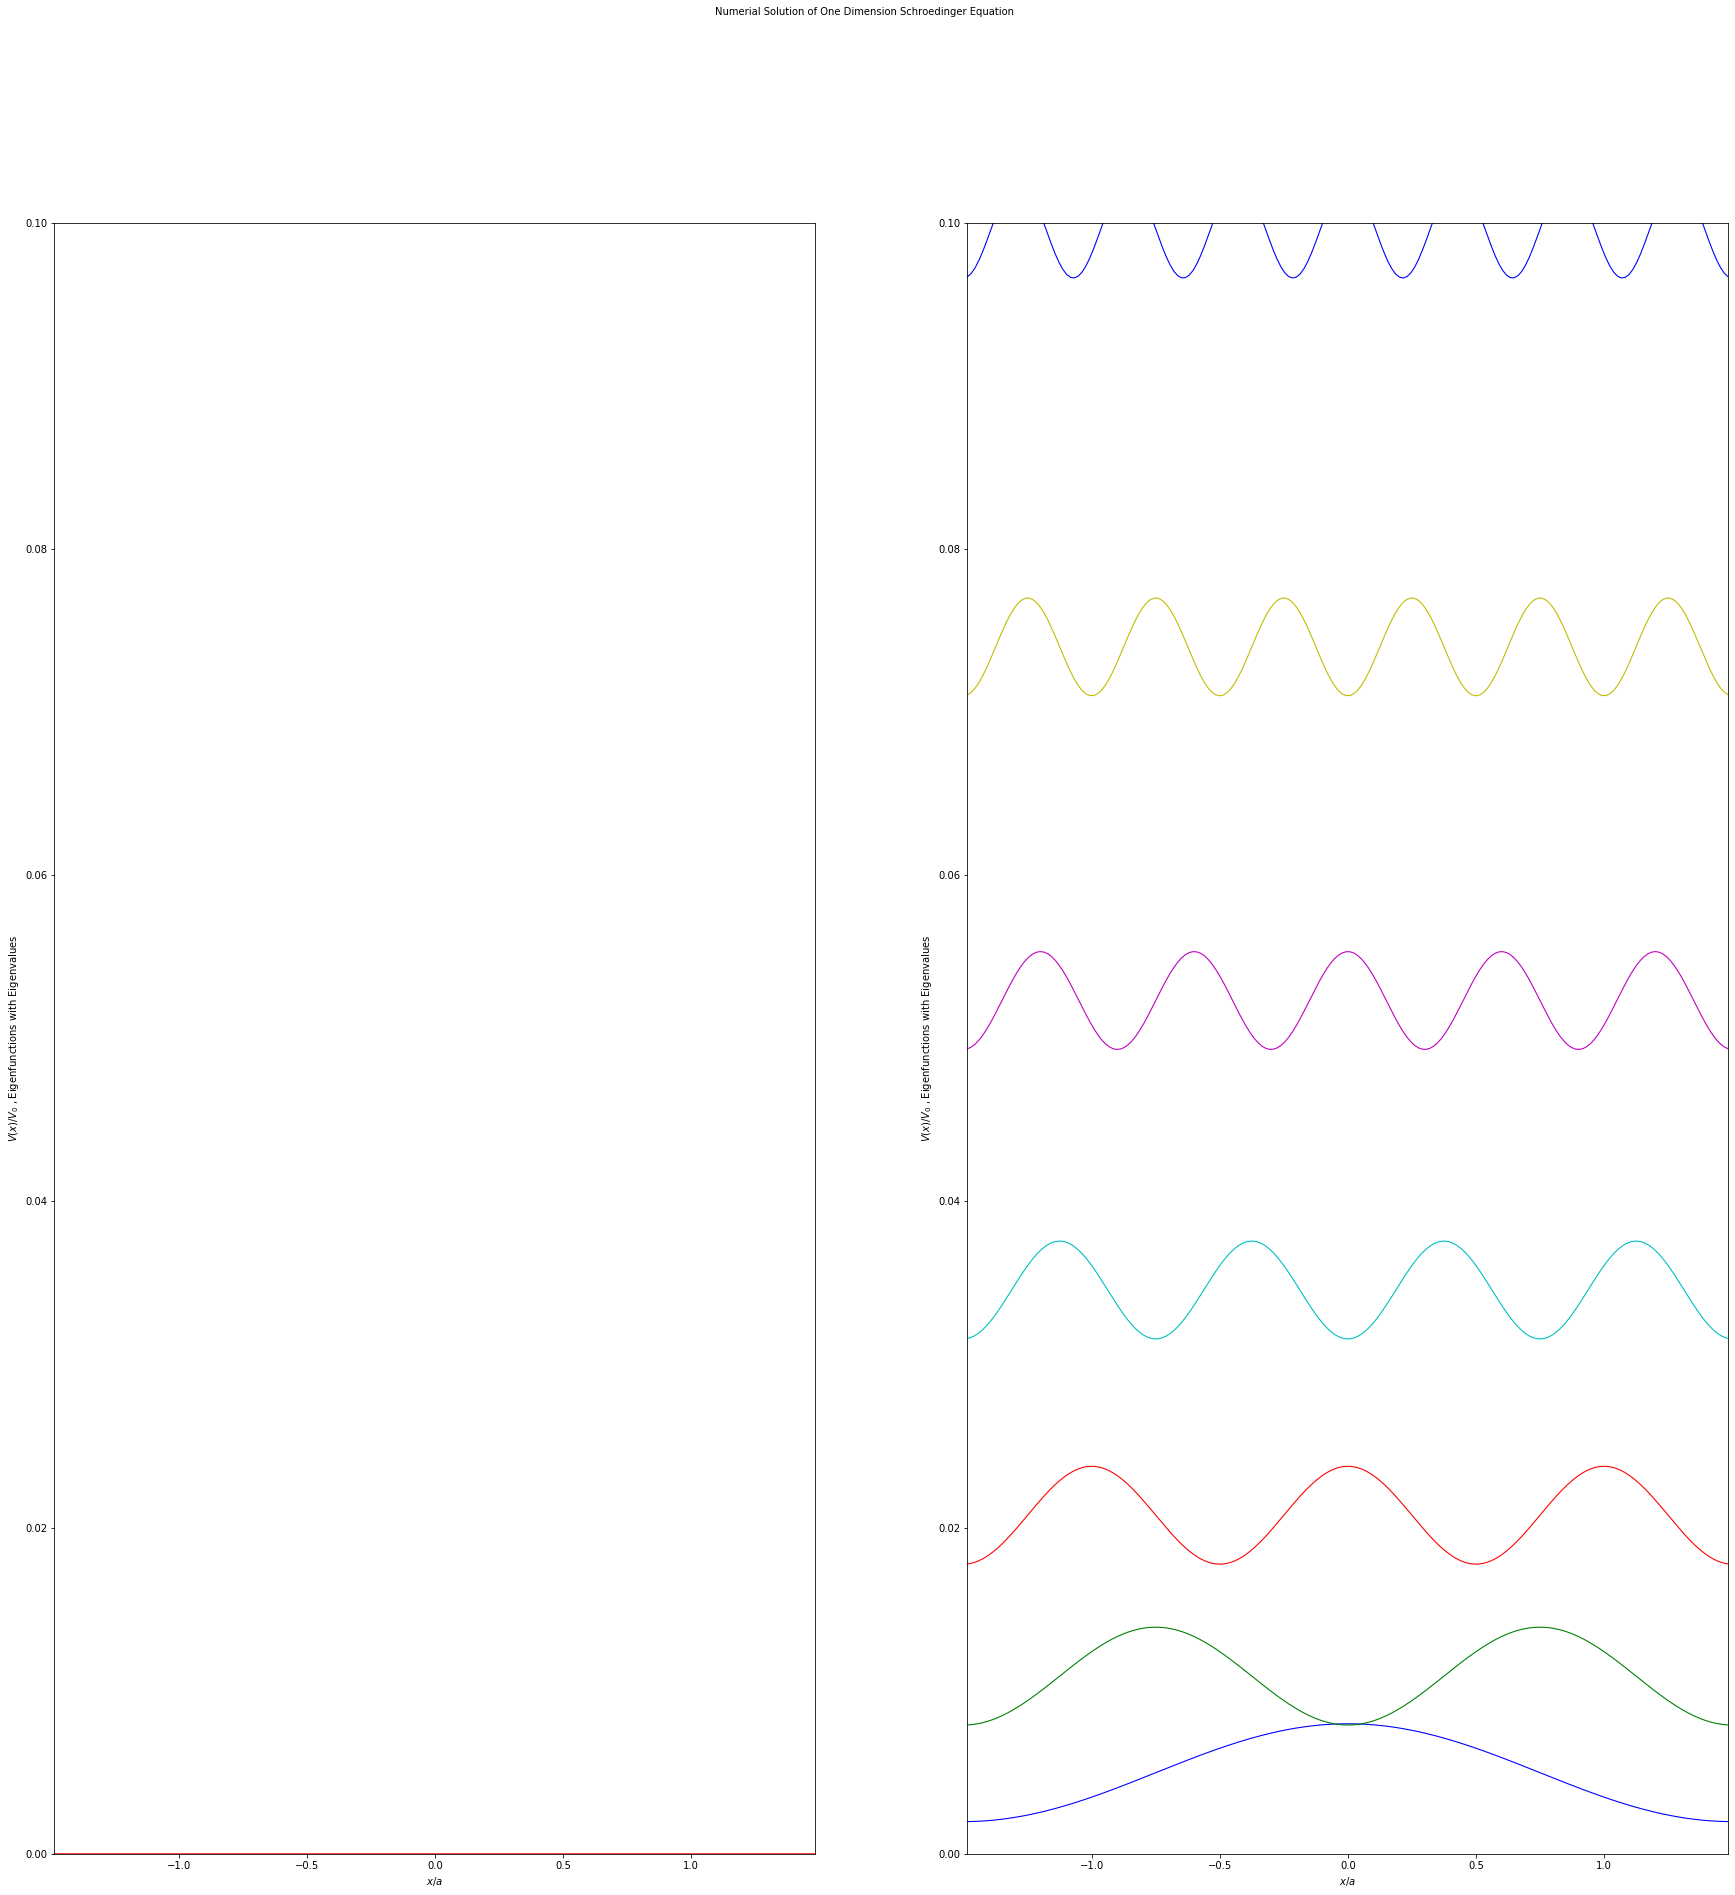

In [26]:
from ipywidgets import FloatSlider, jslink, VBox, HBox

mu = 0.06                                            # Potentialparameter
L = 1.5                                              # x-Bereich ist [-L,L]
N = 200                                              # Zahl der Gitterpunkte
hquer = 0.06                                         # effektives hquer
sigma_x = 0.1                                        # Breite Gauss
zeiten = linspace(0.0, 10.0, 400)                    # Zeiten f. Zeitentw.


swidth = FloatSlider(value = 0.1, min = 0.1, max = 1.0, description = 'Width: ')
sdepth = FloatSlider(value = 0.0, min = -5.0, max = 5.0, description = 'Depth: ')
sxpos = FloatSlider(value = 0.0, min = -L, max = L, description = r'$x_o$: ')

width = 0.1
depth = 0.0

ew, ef, x, dx, V = diagonalisierung(hquer, L, N, x0 = 0.0, width = width, depth = depth)
    
fig, ax = plt.subplots(1, 2, figsize=(30, 30))
fig.canvas.header_visible = False

fig.suptitle('Numerial Solution of One Dimension Schroedinger Equation', fontsize = 10)
plot_eigenfunktionen(ax, ew, ef, x, V)


def on_width_change(change):
    for i in range(len(ax[0].lines)):
        ax[0].lines.pop(0)
    for i in range(len(ax[1].lines)):
        ax[1].lines.pop(0)
    ew, ef, x, dx, V = diagonalisierung(hquer, L, N, x0 = sxpos.value, width = swidth.value, depth = sdepth.value)
    plot_eigenfunktionen(ax, ew, ef, x, V)

def on_depth_change(change):
    for i in range(len(ax[0].lines)):
        ax[0].lines.pop(0)
    for i in range(len(ax[1].lines)):
        ax[1].lines.pop(0)
    ew, ef, x, dx, V = diagonalisierung(hquer, L, N, x0 = 0.0, width = swidth.value, depth = sdepth.value)
    plot_eigenfunktionen(ax, ew, ef, x, V)
    
def on_xpos_change(change):
    for i in range(len(ax[0].lines)):
        ax[0].lines.pop(0)
    for i in range(len(ax[1].lines)):
        ax[1].lines.pop(0)
    ew, ef, x, dx, V = diagonalisierung(hquer, L, N, x0 = sxpos.value, width = swidth.value, depth = sdepth.value)
    plot_eigenfunktionen(ax, ew, ef, x, V)
    
swidth.observe(on_width_change, names = 'value')
sdepth.observe(on_depth_change, names = 'value')
sxpos.observe(on_xpos_change, names = 'value')

display(HBox([swidth, sdepth, sxpos]))

This work has been done with the support of the EPFL Open Science Fund [OSSCAR](http://www.osscar.org).

<img src="http://www.osscar.org/wp-content/uploads/2019/03/OSSCAR-logo.png" style="height:40px; width: 200px"/>